In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/prajwala/Documents/git/Regression_srilankan/modified_dataset.csv")

In [3]:
X = df[['Agriculture', 'Tourism', 'Imports']]  
y = df['Revenue']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
lasso = Lasso(alpha=0.1)

In [7]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [8]:
y_pred = lasso.predict(X_test_scaled)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 38521344846.654785


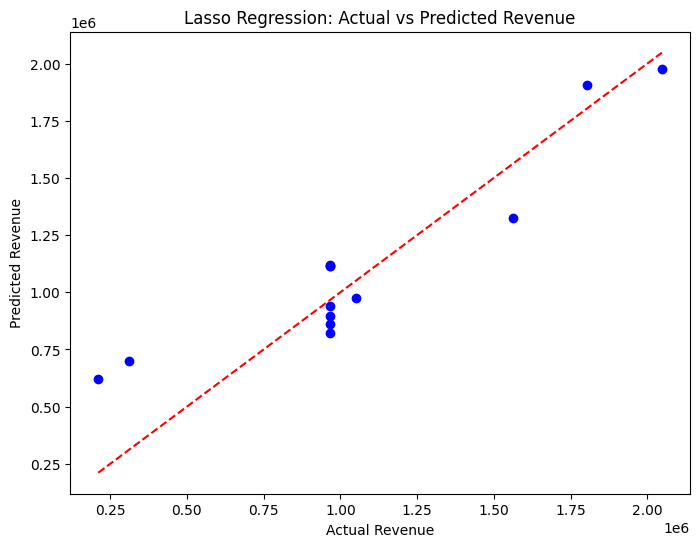

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Lasso Regression: Actual vs Predicted Revenue')
plt.show()

In [11]:
print(f'Coefficients: {lasso.coef_}')
print(f'Intercept: {lasso.intercept_}')

Coefficients: [ 149980.82812688  340910.93926073 -276561.21785656]
Intercept: 971266.3333333333
